Total image slices: 6802
Total mask slices:  6802
✅ All image and mask filenames match 1-to-1.

Random sample: volume_4_480.npy
Image shape: (256, 256), dtype: float32
Mask  shape: (256, 256), dtype: uint8
Mask unique labels: [0 1 2]


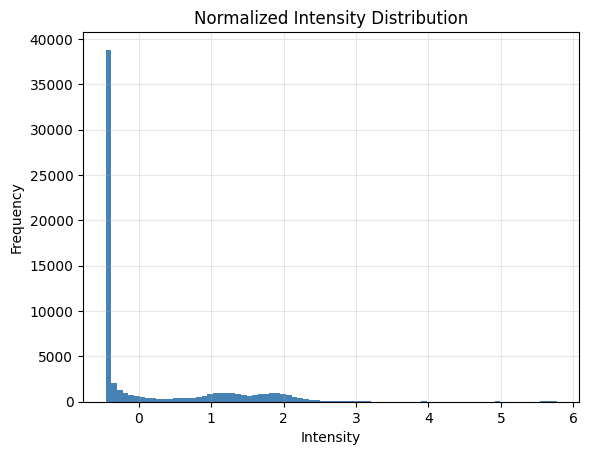

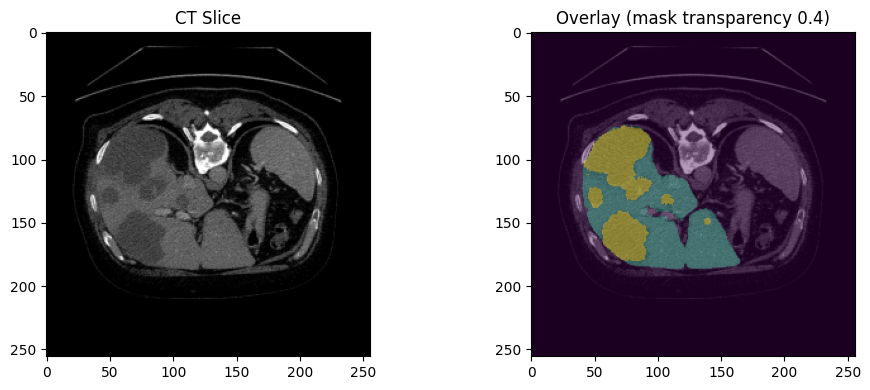


Split summary:
  Train: 4761 slices (70.0%)
  Val:   1020 slices (15.0%)
  Test:  1021 slices (15.0%)


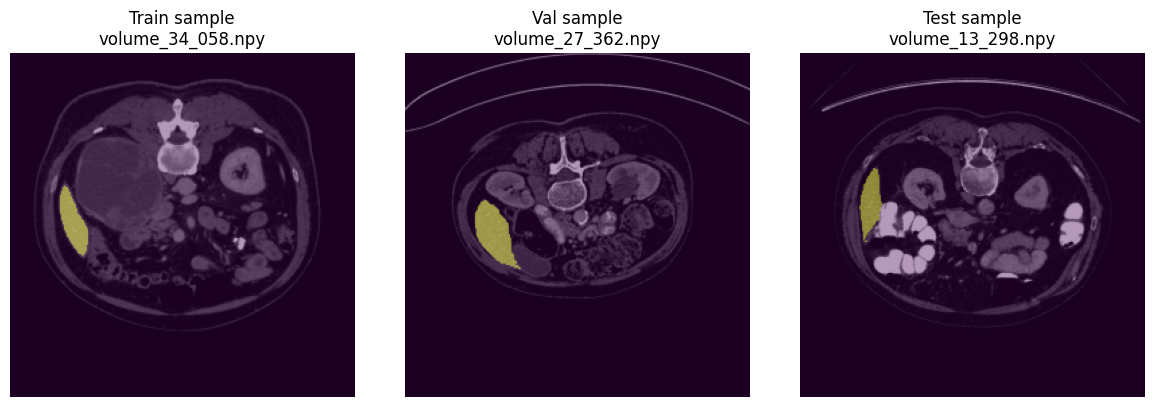


✅ Phase 2 data quality verified successfully.


In [2]:
# =========================================================
# Phase 2 Quality Check Notebook
# Fraunhofer MEVIS Project — Youssef
# =========================================================

import os, json, random
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------------------------------------------------
# Paths
# ---------------------------------------------------------
BASE = Path("../data/processed")
IMG_DIR = BASE / "images"
MSK_DIR = BASE / "masks"
SPLIT_DIR = BASE / "splits"

print(f"Total image slices: {len(os.listdir(IMG_DIR))}")
print(f"Total mask slices:  {len(os.listdir(MSK_DIR))}")

# ---------------------------------------------------------
# 1️⃣ Verify that slices match between images and masks
# ---------------------------------------------------------
img_files = sorted(os.listdir(IMG_DIR))
msk_files = sorted(os.listdir(MSK_DIR))
assert img_files == msk_files, "Image/mask filenames do not align!"
print("✅ All image and mask filenames match 1-to-1.")

# ---------------------------------------------------------
# 2️⃣ Check data shapes and types
# ---------------------------------------------------------
sample = random.choice(img_files)
img = np.load(IMG_DIR / sample)
mask = np.load(MSK_DIR / sample)

print(f"\nRandom sample: {sample}")
print(f"Image shape: {img.shape}, dtype: {img.dtype}")
print(f"Mask  shape: {mask.shape}, dtype: {mask.dtype}")
print(f"Mask unique labels: {np.unique(mask)}")

# ---------------------------------------------------------
# 3️⃣ Plot intensity histogram for normalization sanity-check
# ---------------------------------------------------------
plt.hist(img.flatten(), bins=80, color='steelblue')
plt.title("Normalized Intensity Distribution")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

# ---------------------------------------------------------
# 4️⃣ Visualize image + mask overlay
# ---------------------------------------------------------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("CT Slice")

plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')
plt.imshow(mask, alpha=0.4)
plt.title("Overlay (mask transparency 0.4)")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 5️⃣ Examine split files and ratios
# ---------------------------------------------------------
with open(SPLIT_DIR / "train_ids.json") as f: train = json.load(f)
with open(SPLIT_DIR / "val_ids.json") as f:   val = json.load(f)
with open(SPLIT_DIR / "test_ids.json") as f:  test = json.load(f)

n_total = len(train) + len(val) + len(test)
print("\nSplit summary:")
print(f"  Train: {len(train)} slices ({len(train)/n_total:.1%})")
print(f"  Val:   {len(val)} slices ({len(val)/n_total:.1%})")
print(f"  Test:  {len(test)} slices ({len(test)/n_total:.1%})")

# ---------------------------------------------------------
# 6️⃣ Optional deeper QC — visualize one from each split
# ---------------------------------------------------------
def show_sample(id_list, title):
    fn = random.choice(id_list)
    img = np.load(IMG_DIR / fn)
    mask = np.load(MSK_DIR / fn)
    plt.imshow(img, cmap='gray')
    plt.imshow(mask, alpha=0.4)
    plt.title(title + "\n" + fn)
    plt.axis('off')

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); show_sample(train, "Train sample")
plt.subplot(1,3,2); show_sample(val, "Val sample")
plt.subplot(1,3,3); show_sample(test, "Test sample")
plt.tight_layout()
plt.show()

print("\n✅ Phase 2 data quality verified successfully.")


In [3]:
# ==============================================
# Optional: Save last displayed figures manually
# ==============================================
import os
from datetime import datetime
FIG_DIR = "../docs/figures"
os.makedirs(FIG_DIR, exist_ok=True)

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the current figure (whichever is active)
plt.gcf().savefig(f"{FIG_DIR}/manual_save_{timestamp}.png", dpi=300, bbox_inches='tight')
print(f"✅ Figure saved as {FIG_DIR}/manual_save_{timestamp}.png")


✅ Figure saved as ../docs/figures/manual_save_20251025_195649.png


<Figure size 640x480 with 0 Axes>